## 1. import類
**tqdmはfor文などでプログレスバーを表示させるものです。**

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## 2. 関数を定義
1. 楕円の式
2. 楕円作成関数
3. パラメータのランダム作成関数

In [2]:
ellipse_formula = lambda a, coor, elip_len: (a - coor)**2 / elip_len**2

In [3]:
def make_elip_spot_mirror(elip_len_x_list, elip_len_y_list, coor_x_list, coor_y_list, axis_x, axis_y, ellipse_num):
    
    elip_spot_mirror = np.zeros([axis_x, axis_y])
    
    for k in range(ellipse_num):
        
        for j in range(axis_y):
            for i in range(axis_x):
                y = j + 1
                x = i + 1

                x_formula = ellipse_formula(x, coor_x_list[k], elip_len_x_list[k])
                y_formula = ellipse_formula(y, coor_y_list[k], elip_len_y_list[k])

                if x_formula + y_formula <= 1:
                    elip_spot_mirror[j,i] += 1
    
    return elip_spot_mirror

In [4]:
def make_param_list(dat_n):

    ellipse_nums = []
    param_list = []

    for dat_i in range(dat_n):

        ellipse_nums.append(np.random.randint(1, 10))

        init_elip_len_x_list = np.random.randint(1, 100, size=ellipse_nums[dat_i])
        init_elip_len_y_list = np.random.randint(1, 100, size=ellipse_nums[dat_i])
        init_coor_x_list = np.random.randint(1, 100, size=ellipse_nums[dat_i])
        init_coor_y_list = np.random.randint(1, 100, size=ellipse_nums[dat_i])

        param_list.append(np.array([init_elip_len_x_list, init_elip_len_y_list, init_coor_x_list, init_coor_y_list]))
        
    return param_list, ellipse_nums

## 4. パラメータの初期化と処理を全て実行
1. パラメータの初期化
    1. axis(枠の大きさ)は100で固定
    2. ミラーを格納するdatを初期化
    3. dat_numはdatに含まれるミラーの数を設定する
2. 処理の実行
    1. パラメータのランダム作成
    2. axisと楕円の数は、楕円ごとではなくミラーごとに定めるものなので、zipで別に定義しています。

In [5]:
axis_x = 100
axis_y = 100
dat = []
dat_num = 16

param_list, ellipse_nums = make_param_list(dat_num)
for [elip_len_x_list, elip_len_y_list, coor_x_list, coor_y_list], ellipse_num in tqdm(zip(param_list, ellipse_nums), total=len(ellipse_nums)):
    dat.append(make_elip_spot_mirror(elip_len_x_list, elip_len_y_list, coor_x_list, coor_y_list, axis_x, axis_y, ellipse_num))

100%|██████████| 16/16 [00:05<00:00,  3.17it/s]


## 5. 図を描画

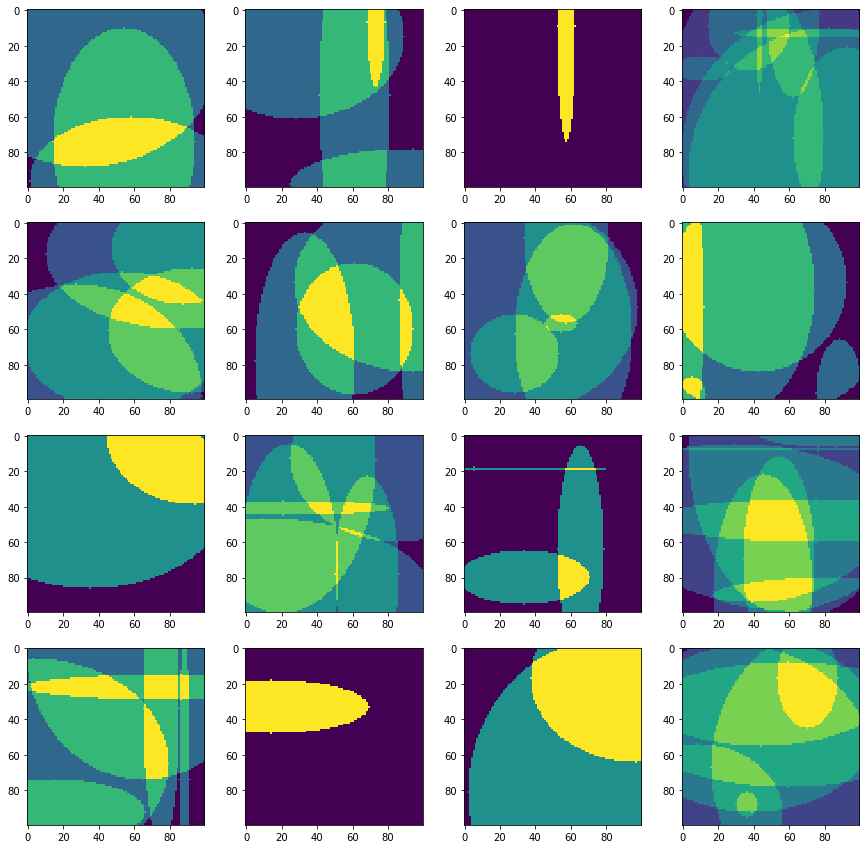

In [6]:
fig = plt.figure(figsize=(15,15))

for i in range(len(dat)):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(dat[i])